# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


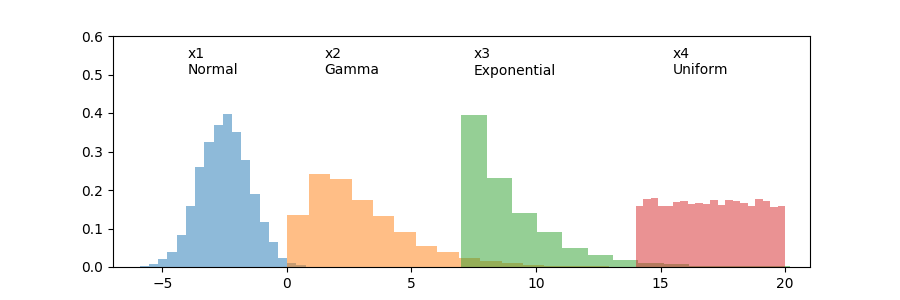

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [3]:
import matplotlib.animation as animation

n=100
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)
x4 = np.random.uniform(0,10, 10000)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()
    
    ax1.hist(x1[:curr], bins=10)
    ax1.set_title('Normal')
    
    ax2.hist(x2[:curr], bins=10)
    ax2.set_title('Gamma')
    
    ax3.hist(x3[:curr], bins=10)
    ax3.set_title('Exponential')
    
    ax4.hist(x4[:curr], bins=10)
    ax4.set_title('Uniform')
    


<IPython.core.display.Javascript object>


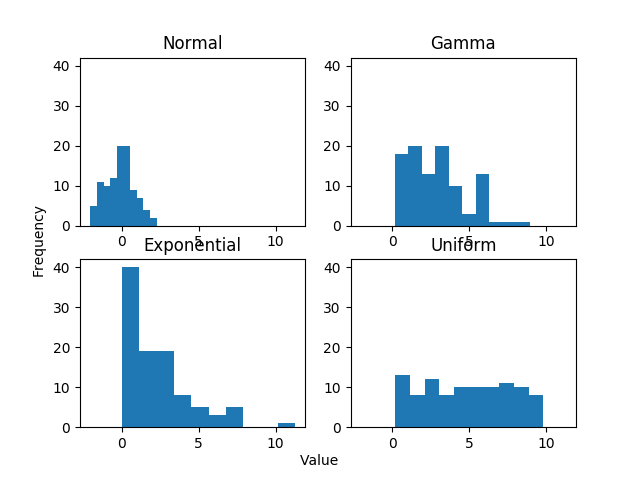

In [4]:
from IPython import display

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Value', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
a = animation.FuncAnimation(fig, update, interval=10, blit=True)

#writergif = animation.PillowWriter(fps=30)
#a.save('Practice Animation Week 3.gif', writer=writergif)
writervideo = animation.FFMpegWriter(fps=30)
a.save('Practice Animation Week 3.mp4', writer=writervideo)


<IPython.core.display.Javascript object>


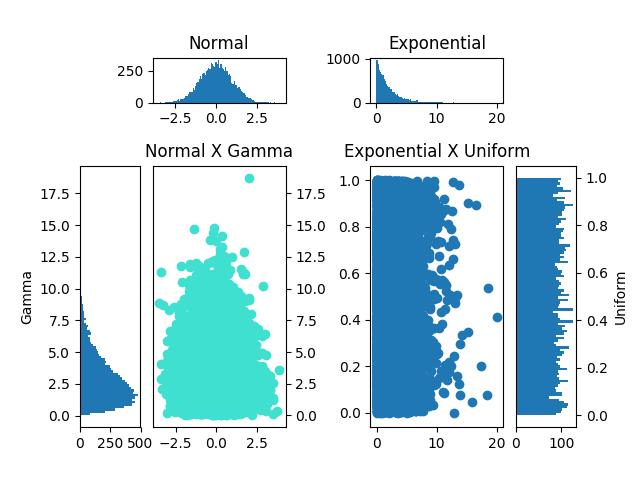

In [5]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(7, 7)

topL_histogram = plt.subplot(gspec[0, 1:3])
sideL_histogram = plt.subplot(gspec[2:, 0])
lowerL_scatter = plt.subplot(gspec[2:, 1:3])

topR_histogram = plt.subplot(gspec[0, 4:6])
sideR_histogram = plt.subplot(gspec[2:, 6])
lowerR_scatter = plt.subplot(gspec[2:, 4:6])

sideR_histogram.yaxis.tick_right()

lowerL_scatter.yaxis.tick_right()

In [6]:
X = np.random.normal(0, 1, 10000)
Y = np.random.gamma(2, 1.5, 10000)

lowerL_scatter.clear()
topL_histogram.clear()
sideL_histogram.clear()

lowerL_scatter.scatter(X, Y, color ='turquoise')
topL_histogram.hist(X, bins = 100)
s= sideL_histogram.hist(Y, bins = 100, orientation = 'horizontal')

A = np.random.exponential(2, 10000)
B = np.random.uniform(0, 1, 10000)

lowerR_scatter.clear()
topR_histogram.clear()
sideR_histogram.clear()

lowerR_scatter.scatter(A, B)
topR_histogram.hist(A, bins = 100)
s2 = sideR_histogram.hist(B, bins = 100, orientation = 'horizontal')

lowerL_scatter.set_title('Normal X Gamma')
topL_histogram.set_title('Normal')
sideL_histogram.set_ylabel('Gamma')

lowerR_scatter.set_title('Exponential X Uniform')
topR_histogram.set_title('Exponential')
sideR_histogram.set_ylabel('Uniform')

sideR_histogram.yaxis.set_label_position('right')